In [19]:
#导入np, plt, pd等包
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

# 总结

**本章最后，我们将下载加拿大2012年的天气，并保存在CSV文件里面。
我们按照月份下载下来，并将数据合并在一起。
下面就是2012年每个小时的气温！**

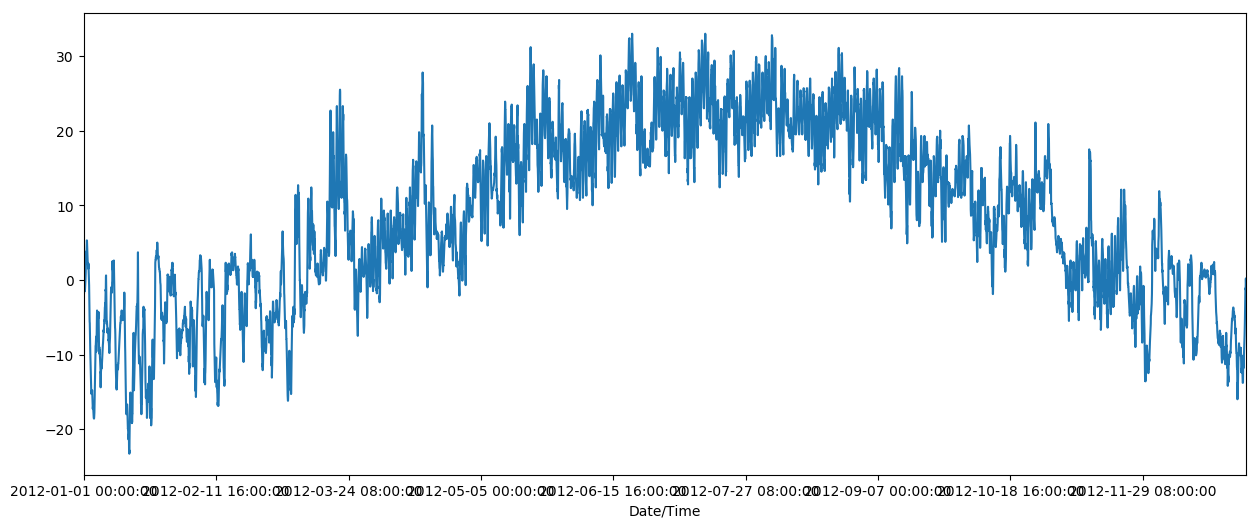

In [2]:
weather_2012_final = pd.read_csv('data/weather_2012.csv', index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

# 5.1 下载一个月的天气

**玩骑行数据的时候，我需要气温和降水数据来观察人们在下雨的时候是否喜欢骑车。所以我去
[加拿大历史天气查询]( http://climate.weather.gc.ca/error/dbdown_e.html#access"/)查了下怎么自动获取数据。**
**下面我们将获得2012年3月的数据，并将其清理干净。**
**下面是你获得数据的URL模板**

In [3]:
url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

**为了获得2012年三月的数据，我们需要format到 month = 3, year = 2012**

In [5]:
#url = url_template.format(month=3, year=2012)
#weather_mar2012 = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, encoding='latin1', header=True)

**P.S. 我发现上面的数据已经不能获取了，不过作者已经将数据保存在CSV文件里面了，我们直接调用就可以**

In [11]:
weather_2012 = pd.read_csv('data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# 6.1 字符串操作

**你会发现‘Weather’列中存在每个小时天气的文字说明。我们假设当文字说明含有‘Snow’的时候在下雪**

**pandas提供了向量字符串函数，可以让我们很便捷的处理列中的文本。**

**[文档](http://http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods/)中含有丰富的例子。**

In [12]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

**上面的例子提供给我们了一个二维向量，但是很难直接看，所以我们把它画出来看看。**

In [14]:
#意义不明确
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

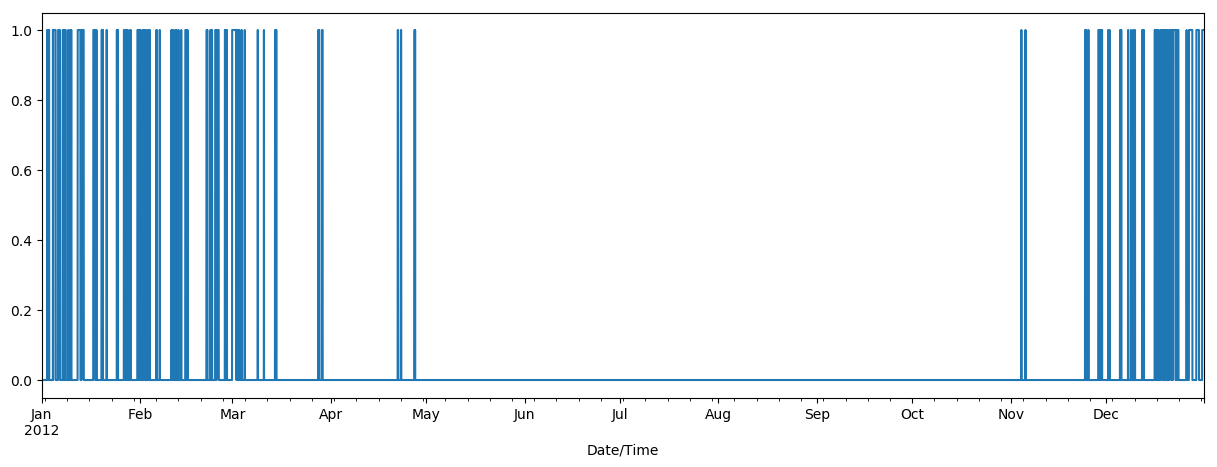

In [16]:
#更有用一点的
is_snowing.plot()

# 6.2 用重采样寻找下雪最多的月

**如果我们想得到每月温度的中值，我们可以使用resample()方法：**

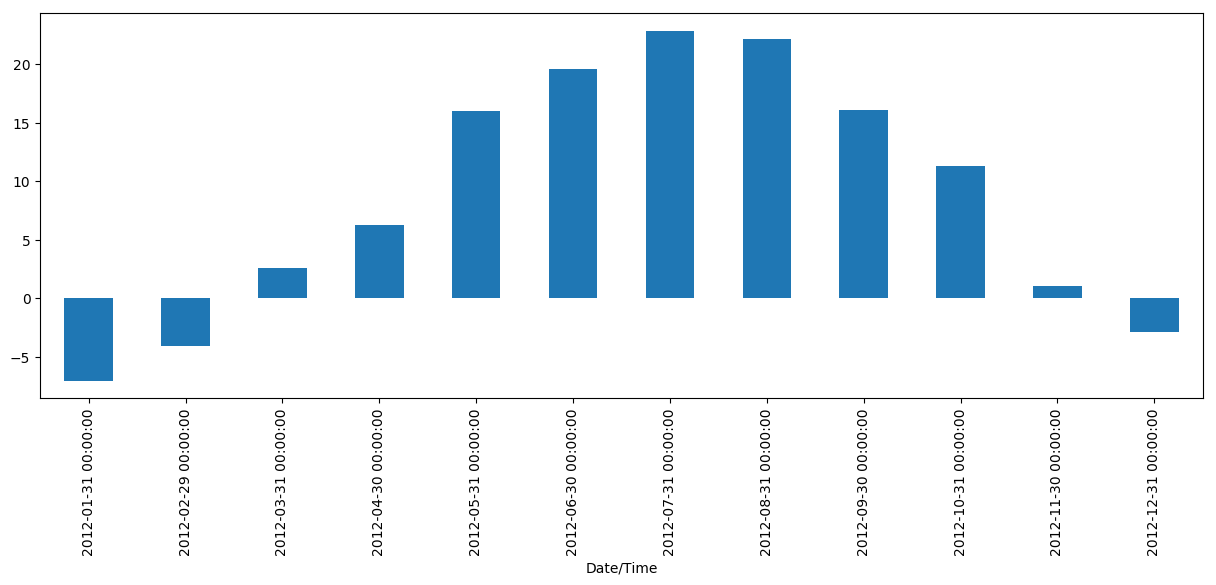

In [20]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')

**可以看出七八月温度最高。**

**我们可以认为用一系列的1和0来代替True个False来表示下不下雪**

In [21]:
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

**用resample方法去获得一个月中下雪的百分比**

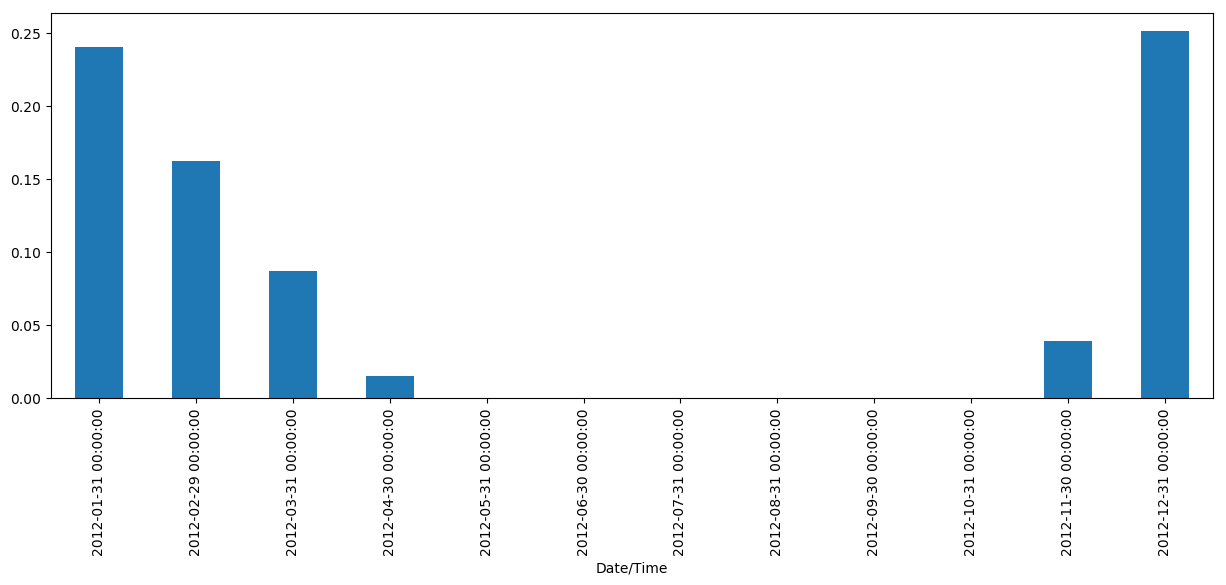

In [22]:
is_snowing.astype(float).resample('M').apply(np.mean).plot(kind='bar')

**从上面可以看出，十二月下雪最多。**

# 6.3 将温度和下雪概率画在一起

**我们可以把这两个数据合在同一个数据框架里面并画在一起**

In [24]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

#命名列
temperature.name = 'Temperature'
snowiness.name = 'Snowiness'

**我们用concat将两个统计数据放在一个数据框架里面**

In [25]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


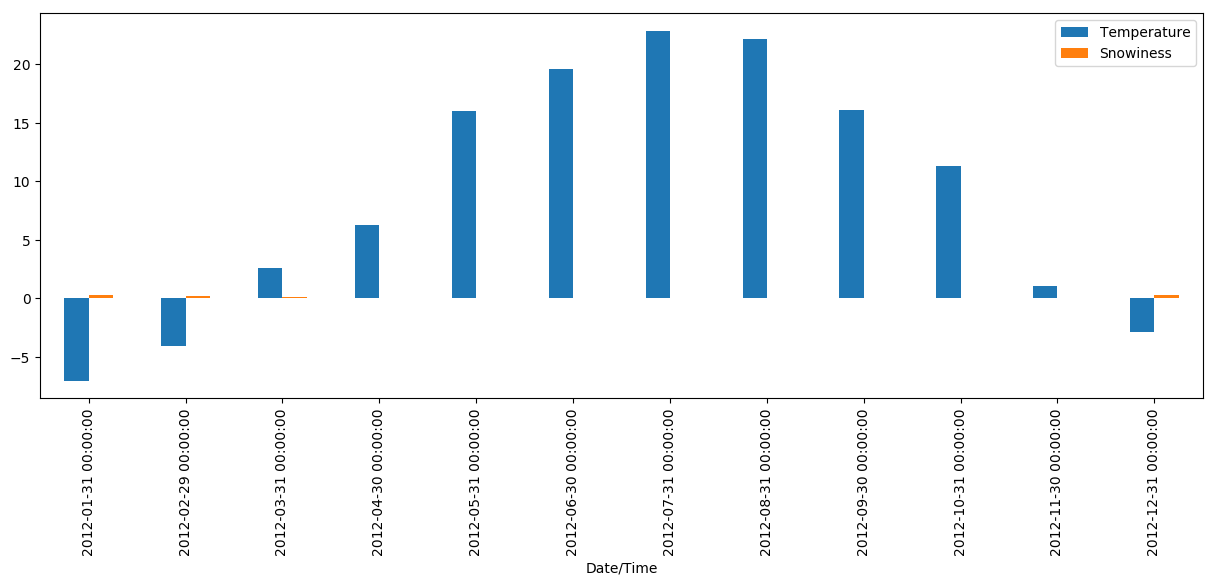

In [26]:
stats.plot(kind='bar')

**因为不同的scale，画出来并不怎么样，我们先分开画**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001520A4C5470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001520AB4ABA8>], dtype=object)

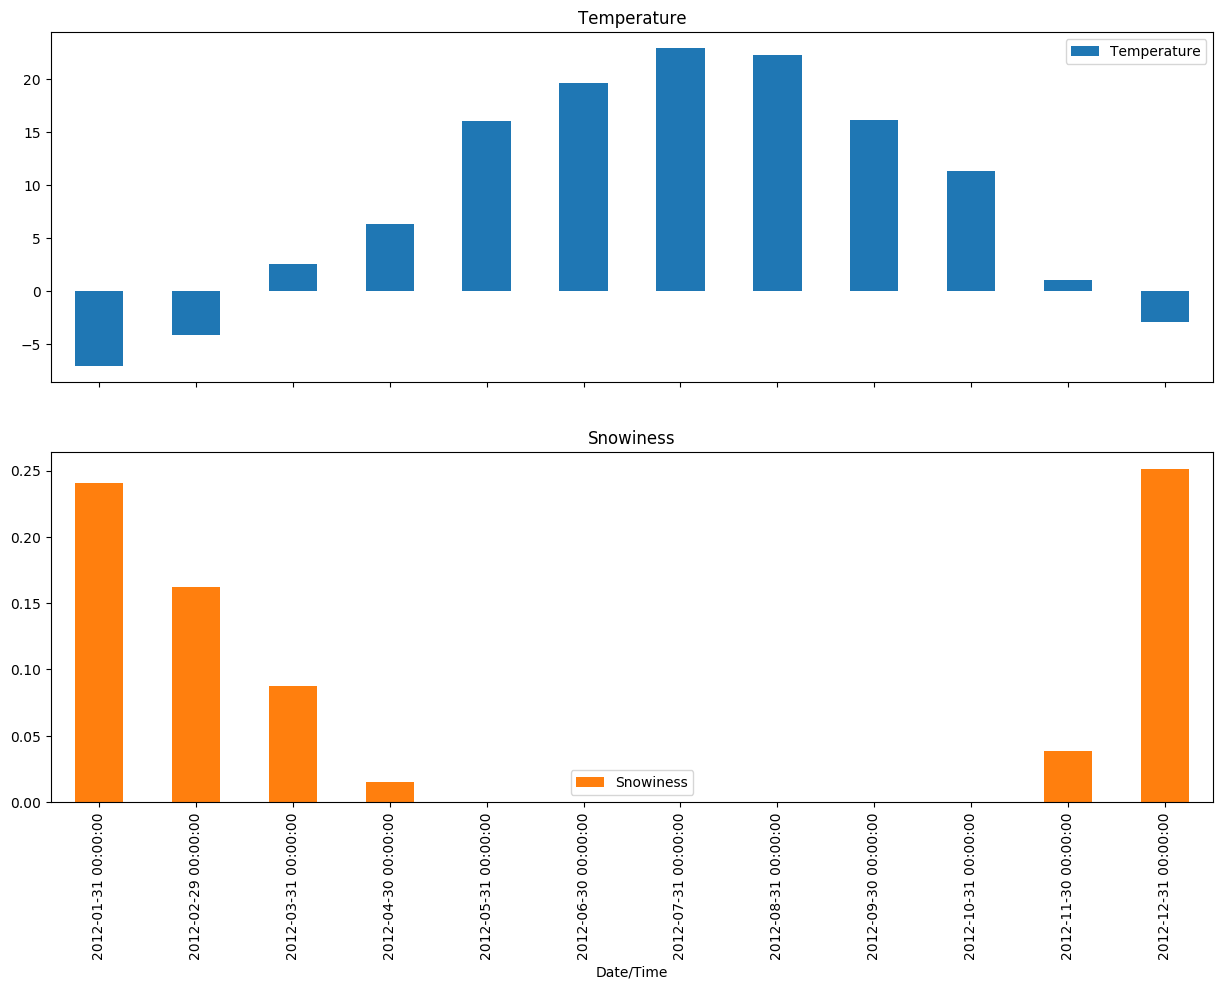

In [29]:
stats.plot(kind='bar', subplots=True, figsize=(15,10))